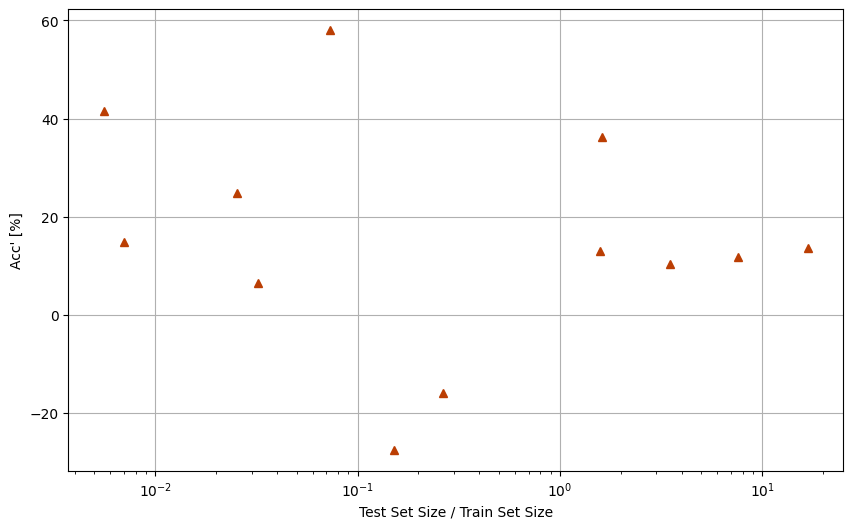

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
test_train_pairs = [
    ("Shenzhen/Covid", 0.03211784593, 0.06389737828),
    ("Shenzhen/Pneumonia", 0.02549846626, 0.2475262961),
    ("Shenzhen/Montgomery", 1.62195122, 0.362676917),
    ("Covid/Shenzhen", 3.483627204, 0.1026808453),
    ("Covid/Pneumonia", 0.2651457055, -0.1589831482),
    ("Covid/Montgomery", 16.86585366, 0.1364686941),
    ("Pneumonia/Shenzhen", 1.571788413, 0.1297649075),
    ("Pneumonia/Covid", 0.1506882396, -0.2757899109),
    ("Pneumonia/Montgomery", 7.609756098, 0.1170738862),
    ("Montgomery/Shenzhen", 0.07304785894, 0.5803757951),
    ("Montgomery/Covid", 0.007003139338, 0.1491780565),
    ("Montgomery/Pneumonia", 0.005559815951, 0.4159881095)
]

# Separate data into lists
pairs, test_train_sizes, accuracies = zip(*test_train_pairs)

# Plot
plt.figure(figsize=(10, 6))
plt.semilogx(test_train_sizes, 100.0*np.array(accuracies), '^', color='#BB3E03')
plt.xlabel('Test Set Size / Train Set Size')
plt.ylabel("Acc\' [%]")

# Annotate points with labels
# for i, pair in enumerate(pairs):
#     plt.annotate(pair, (test_train_sizes[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
# plt.show()
plt.savefig('figs/mlhc_DTL.pdf', dpi=300)


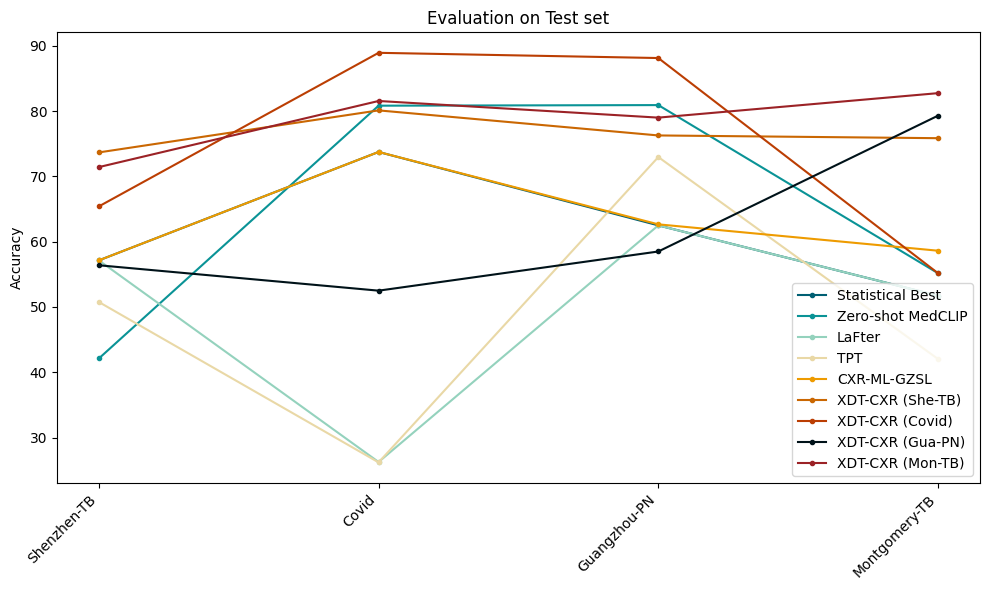

In [4]:
import matplotlib.pyplot as plt

# Data from the LaTeX table
methods = ["Statistical Best", "Zero-shot MedCLIP", "LaFter", "TPT", "CXR-ML-GZSL",
           "XDT-CXR (She-TB)", "XDT-CXR (Covid)", "XDT-CXR (Gua-PN)", "XDT-CXR (Mon-TB)"]

# Accuracy data for each backbone
accuracy_data = {
    "Shenzhen-TB": [57.14, 42.11, 57.14, 50.76, 57.14, 73.68, 65.41, 56.39, 71.43],
    "Covid": [73.75, 80.84, 26.25, 26.19, 73.75, 80.12, 88.94, 52.50, 81.56],
    "Guangzhou-PN": [62.50, 80.93, 62.50, 72.97, 62.66, 76.28, 88.14, 58.50, 79.01],
    "Montgomery-TB": [51.72, 55.17, 51.72, 42.03, 58.62, 75.86, 55.17, 79.31, 82.76]
}
# Theme colors in hexadecimal codes
theme_colors = ['#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00',
                '#CA6702', '#BB3E03', '#001219', '#9B2226']

# Plotting
plt.figure(figsize=(10, 6))

for i, method in enumerate(methods):
    plt.plot(list(accuracy_data.keys()), [data[i] for data in accuracy_data.values()], marker='.', label=method, color=theme_colors[i])

# Adding labels and legend
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Evaluation on Test set')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.show()
plt.savefig('figs/mlhc_evaluation.pdf', dpi=300)


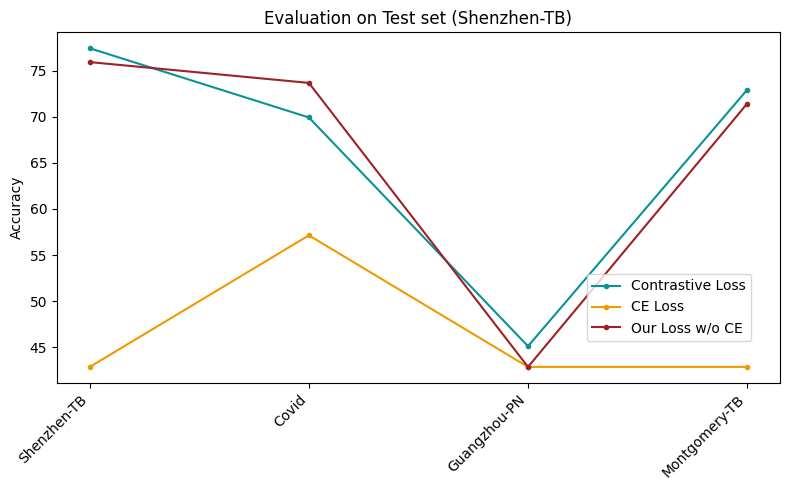

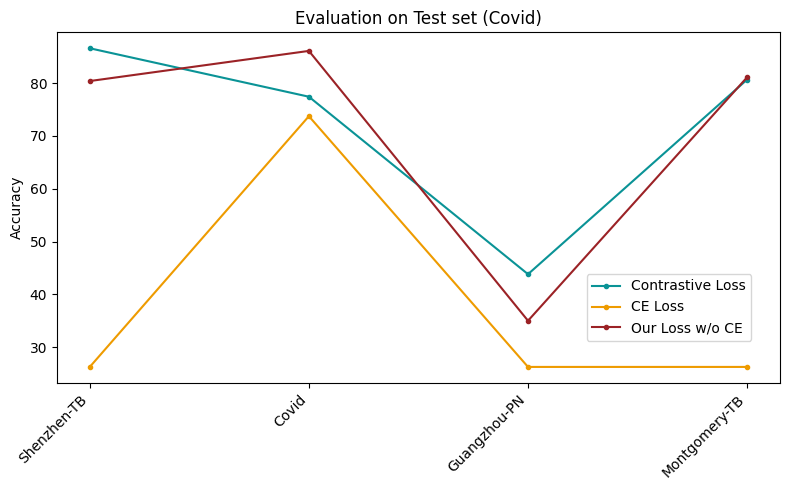

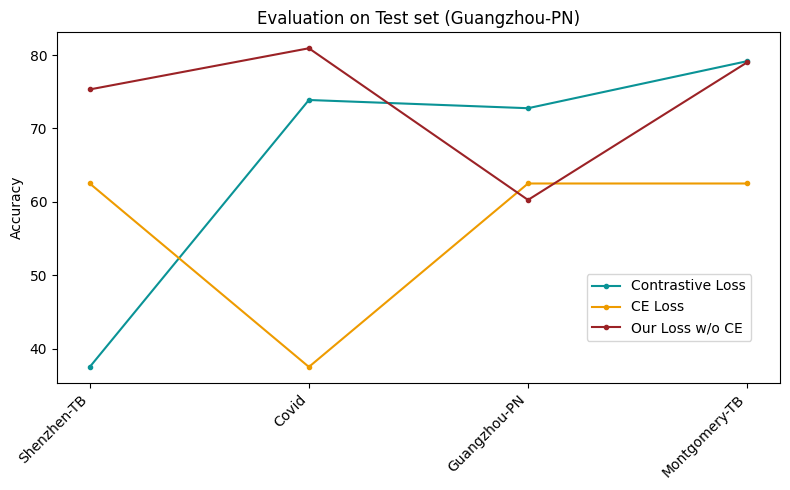

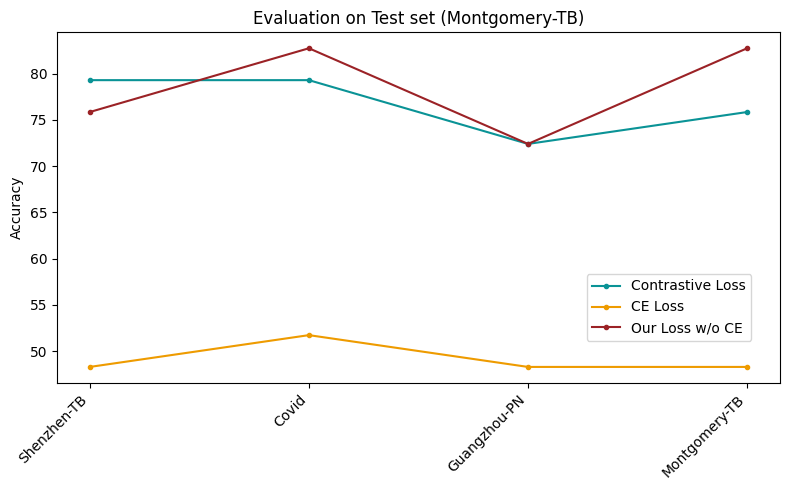

In [2]:
import matplotlib.pyplot as plt

# Data from the LaTeX table
models = ["Shenzhen-TB", "Covid", "Guangzhou-PN", "Montgomery-TB"]
loss_functions = ["Contrastive Loss", "CE Loss", "Our Loss w/o CE"]

# Accuracy data for each model and loss function
accuracy_data = {
    "Shenzhen-TB": {
        "Contrastive Loss": [77.44, 69.93, 45.11, 72.93],
        "CE Loss":          [42.86, 57.14, 42.86, 42.86],
        "Our Loss w/o CE":  [75.94, 73.68, 42.86, 71.43]
    },
    "Covid": {
        "Contrastive Loss": [86.62, 77.44, 43.82, 80.69],
        "CE Loss":          [26.25, 73.75, 26.25, 26.25],
        "Our Loss w/o CE":  [80.41, 86.12, 35.00, 81.13]
    },
    "Guangzhou-PN": {
        "Contrastive Loss": [37.50, 73.88, 72.76, 79.17],
        "CE Loss":          [62.50, 37.50, 62.50, 62.5],
        "Our Loss w/o CE":  [75.32, 80.93, 60.26, 79.01]
    },
    "Montgomery-TB": {
        "Contrastive Loss": [79.31, 79.31, 72.41, 75.86],
        "CE Loss":          [48.28, 51.72, 48.28, 48.28],
        "Our Loss w/o CE":  [75.86, 82.76, 72.41, 82.76]
    }
}
# Theme colors in hexadecimal codes
theme_colors = ['#0A9396', '#EE9B00', '#9B2226']
# Plotting
for model in models:
    plt.figure(figsize=(8, 5))
    for i, loss_function in enumerate(loss_functions):
        plt.plot(models, accuracy_data[model][loss_function], marker='.', label=loss_function, color=theme_colors[i])
    plt.savefig(f'figs/mlhc_ablation_loss_{model}.pdf', dpi=300)
    # Adding labels and legend
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Accuracy')
    plt.title('Evaluation on Test set (' + model + ')')
    plt.legend(loc='lower right', bbox_to_anchor=(0.97, 0.1))

    plt.tight_layout()
    # plt.show()


